### Student Performance Indicator 

#### Life cycle of Machine Learning Project
    - Understanding the problem statement 
    - Data collection 
    - Data checks to perform
    - Exploratory data analysis
    - Data pre-processng 
    - Model training 
    - Choose best model 


#### 1) Probelem Statement :
    - This project understands how the student's performance (test-scores) is affected by the other variables such as gender, ethnicity, etc..

#### 2) Data Collection:
    - kaggle dataset 
    

#### 3) Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the dataset 
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

#### 3.1) Data Checks to perform

    - Check missing values
    - Check duplicates
    - Check data type 
    - Check he number of unique values of each column 
    - Check statistic of the data-set
    - Check various categories present in the different categorical columns

### Check missing values 

In [13]:
# Check missing values 
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

 - There are no missing values across all 8 columns, meaning no imputation or dropping of rows is required. The dataset is complete and ready for analysis without any data cleaning needed for null values

- ------------------------------------------------------------------------------

#### Check duplicates 

In [18]:
# Check duplicates 
df.duplicated().sum()

0

- No duplicate rows were found, confirming that each of the 1000 records represents a unique student. This ensures our analysis won't be skewed by repeated entries
  

- ------------------------------------------------------------------------------

#### Check data types

In [23]:
# Check nulll and dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- All data types are as expected. categorical columns are stored as object and numerical scores as int64. No type conversion is needed before analysis

- ------------------------------------------------------------------------------

#### Checking the number of unique values in each column 


In [28]:
# Unique values in the column 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

- The low unique counts for categorical columns confirm they are suitable for groupby analysis and can be used as segmentation variables to compare score performance across groups. for example, does completing the test preparation course improve scores?"

- ------------------------------------------------------------------------------

#### Checking the statistics

In [33]:
# Statistics 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000



##### Insights:
1. Distribution Shape
Compare mean vs median (50%) for each subject — are they close? What does that tell you about symmetry/skew?
- no extreme outliers are pulling the average, so the mean is a reliable measure of typical performance.
  
2. Data Quality / Outliers
Any suspicious values? (hint: that math minimum of 0) — flag it and question it.
- A score of 0 is unlikely in a real exam setting and should be investigated before any further analysis, as it could skew the mean downward.
  
4. Cross-subject Comparison
Which subject has the highest/lowest mean? Which has the most spread (std)? What might that suggest about difficulty or consistency?
- Math std is 15.16, reading is 14.60, writing is 15.19. Writing and math have more variation than reading, meaning reading performance is slightly more consistent across students. 
  
6. Spread & Concentration
Look at the IQR (25%–75% range) — how wide is it? Are students clustered together or all over the place?
- the IQR for math is 20 points (57–77), meaning even the middle 50% of students show considerable variation in performance. This suggests math ability is not consistent across the student population, unlike a subject where students would cluster tightly around the mean.
  
8. So What? (The Takeaway)
End with a conclusion or a question to investigate next. This is what separates a data analyst from someone just reading numbers.
- Math appears to be the most challenging subject with the lowest mean and a potential data quality issue at the minimum. A deeper look into factors like study time or tutoring access could explain the performance gap.

- ------------------------------------------------------------------------------

### Exploring data

In [38]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [40]:
categorical_features = [features for features in df.columns 
                        if df[features].dtype == "O"]
print(f"Categorical Features : {categorical_features}\n")

numerical_features = [features for features in df.columns 
                      if df[features].dtype !="O"]
print(f"Numerical Features : {numerical_features}")

Categorical Features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

Numerical Features : ['math score', 'reading score', 'writing score']


In [42]:
for feature in categorical_features:
    print(f"Categories in {feature} variable: {df[feature].unique()}")
    print(f"Number of unique categories in {feature} variable: {len(df[feature].unique())}\n")



Categories in gender variable: ['female' 'male']
Number of unique categories in gender variable: 2

Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Number of unique categories in race/ethnicity variable: 5

Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Number of unique categories in parental level of education variable: 6

Categories in lunch variable: ['standard' 'free/reduced']
Number of unique categories in lunch variable: 2

Categories in test preparation course variable: ['none' 'completed']
Number of unique categories in test preparation course variable: 2



### Adding columns for "total score" and "average"

In [45]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average"] = df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [47]:
# Number of students with full marks 
for feature in numerical_features:
    count = (df[feature] == 100).sum()
    print(f"for {feature.split()[0]}: {count} student scored 100")
        

for math: 7 student scored 100
for reading: 17 student scored 100
for writing: 14 student scored 100


In [49]:
# Number of students with marks less than 20 
for feature in numerical_features:
    count = (df[feature] <= 20).sum()
    print(f"for {feature.split()[0]}: {count} students scores less than or equal 20")


for math: 4 students scores less than or equal 20
for reading: 1 students scores less than or equal 20
for writing: 3 students scores less than or equal 20


 - Alot of students struggle in Math, than reading and writing, students do well in reading but fairly in writing

-------------------------------------------------------------------------------

### 4) Exploring Data (Visualization)

### Categorical Variables 


### Understand the groups before dividing into numbers

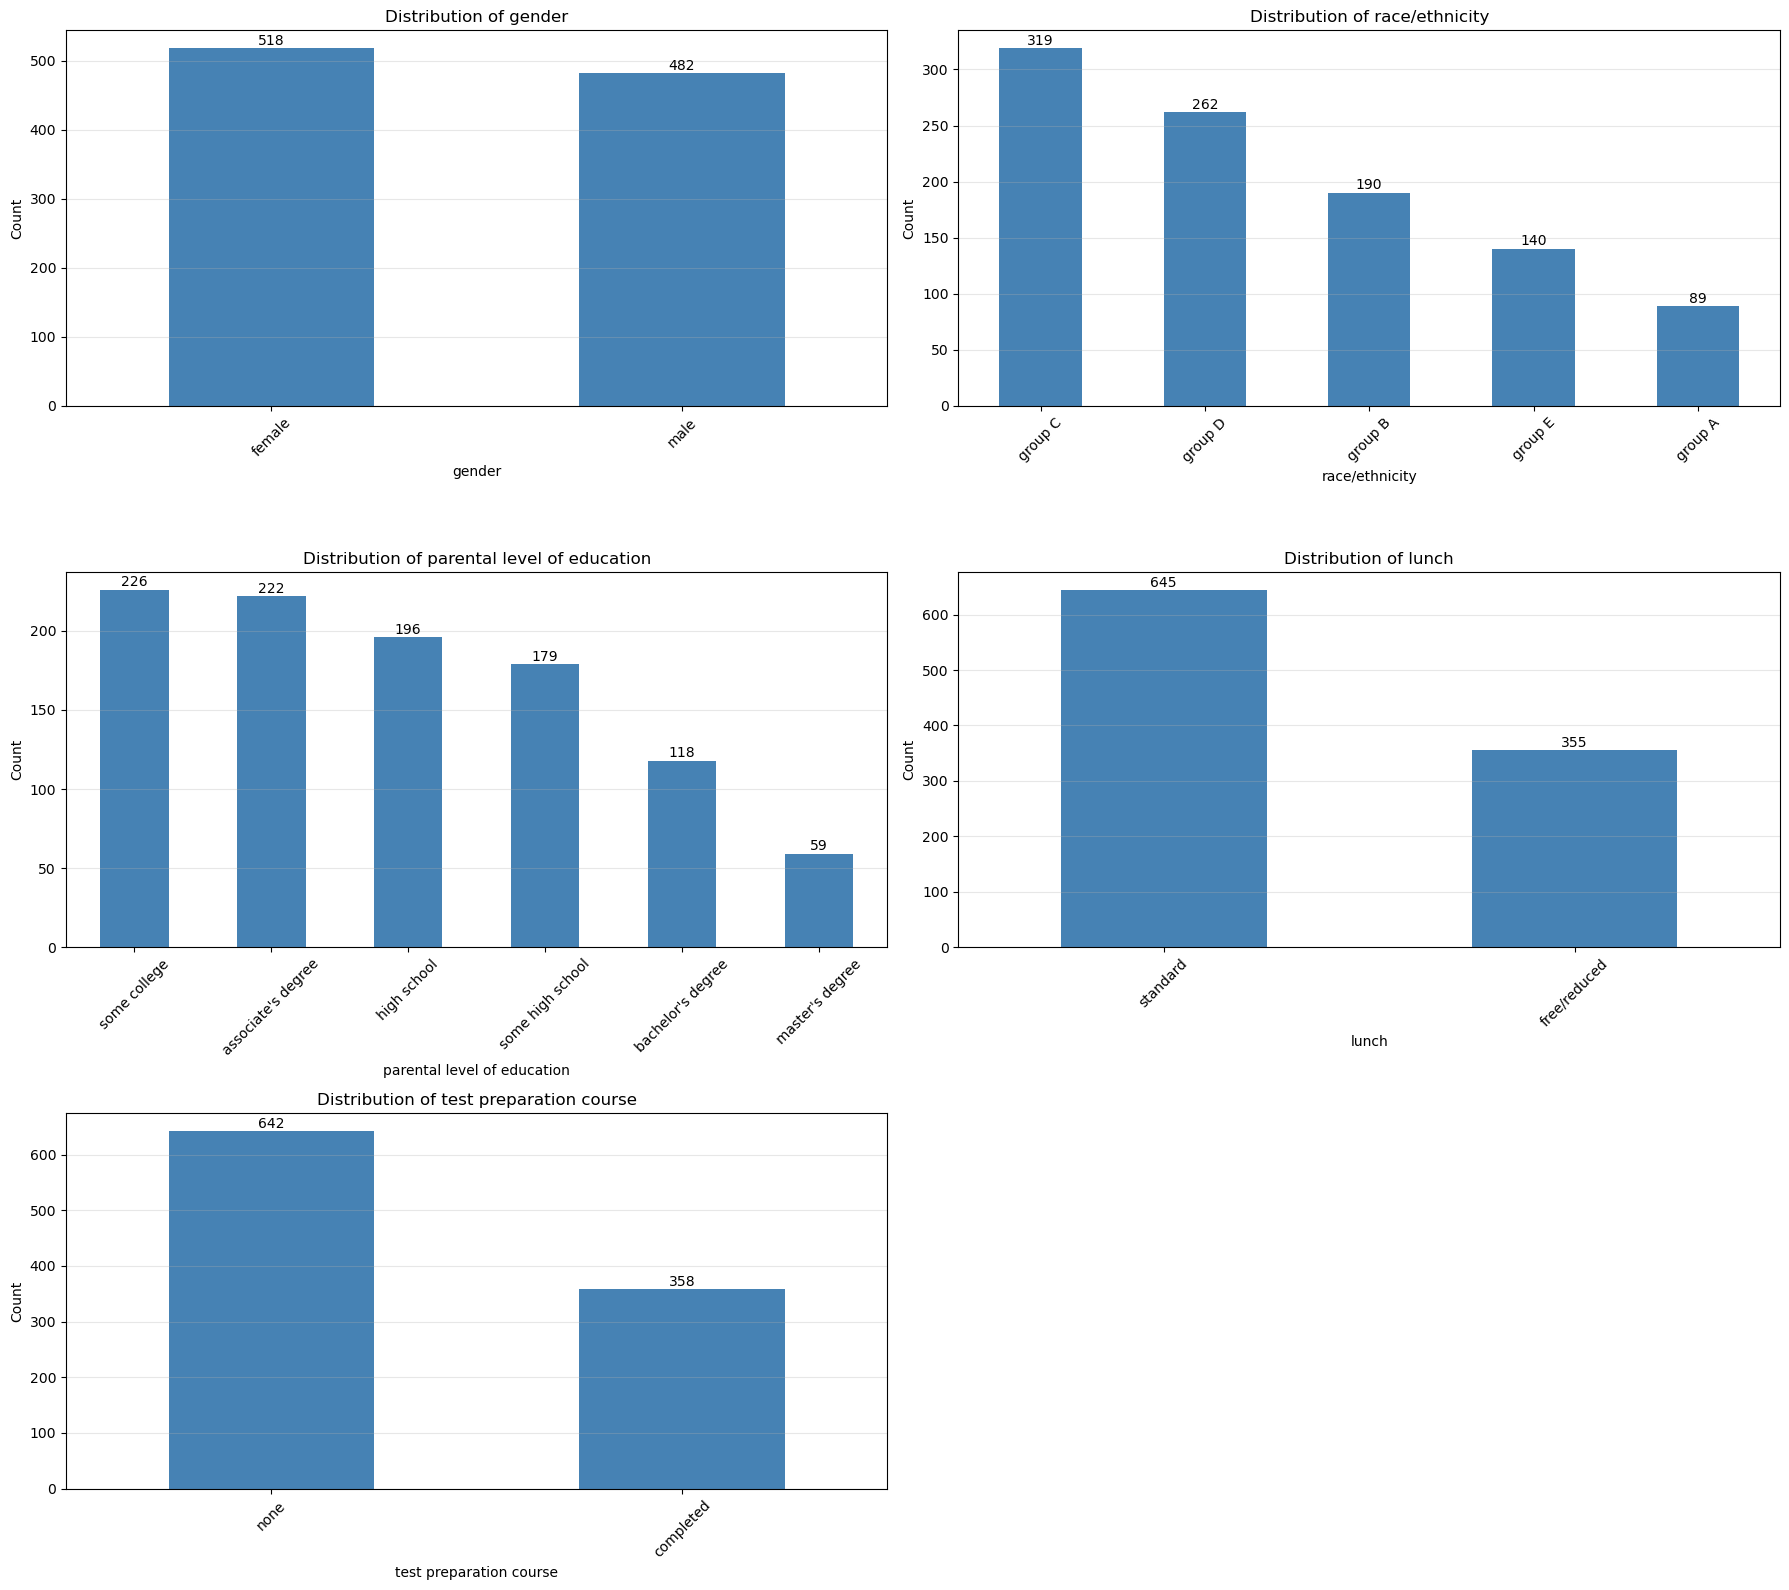

In [56]:
# Bar plots for all categorical features 

fig, axes = plt.subplots(3, 2, figsize = (18, 16))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind = "bar", ax = axes[i], color = "steelblue")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis = "x", rotation = 45)
    axes[i].grid(axis = "y", alpha = 0.3)

    for patch in axes[i].patches:
        axes[i].text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height() + 0.3,
            int(patch.get_height()),
            ha='center', va='bottom', fontsize=10
        )

fig.delaxes(axes[-1])    
plt.tight_layout()
plt.show()

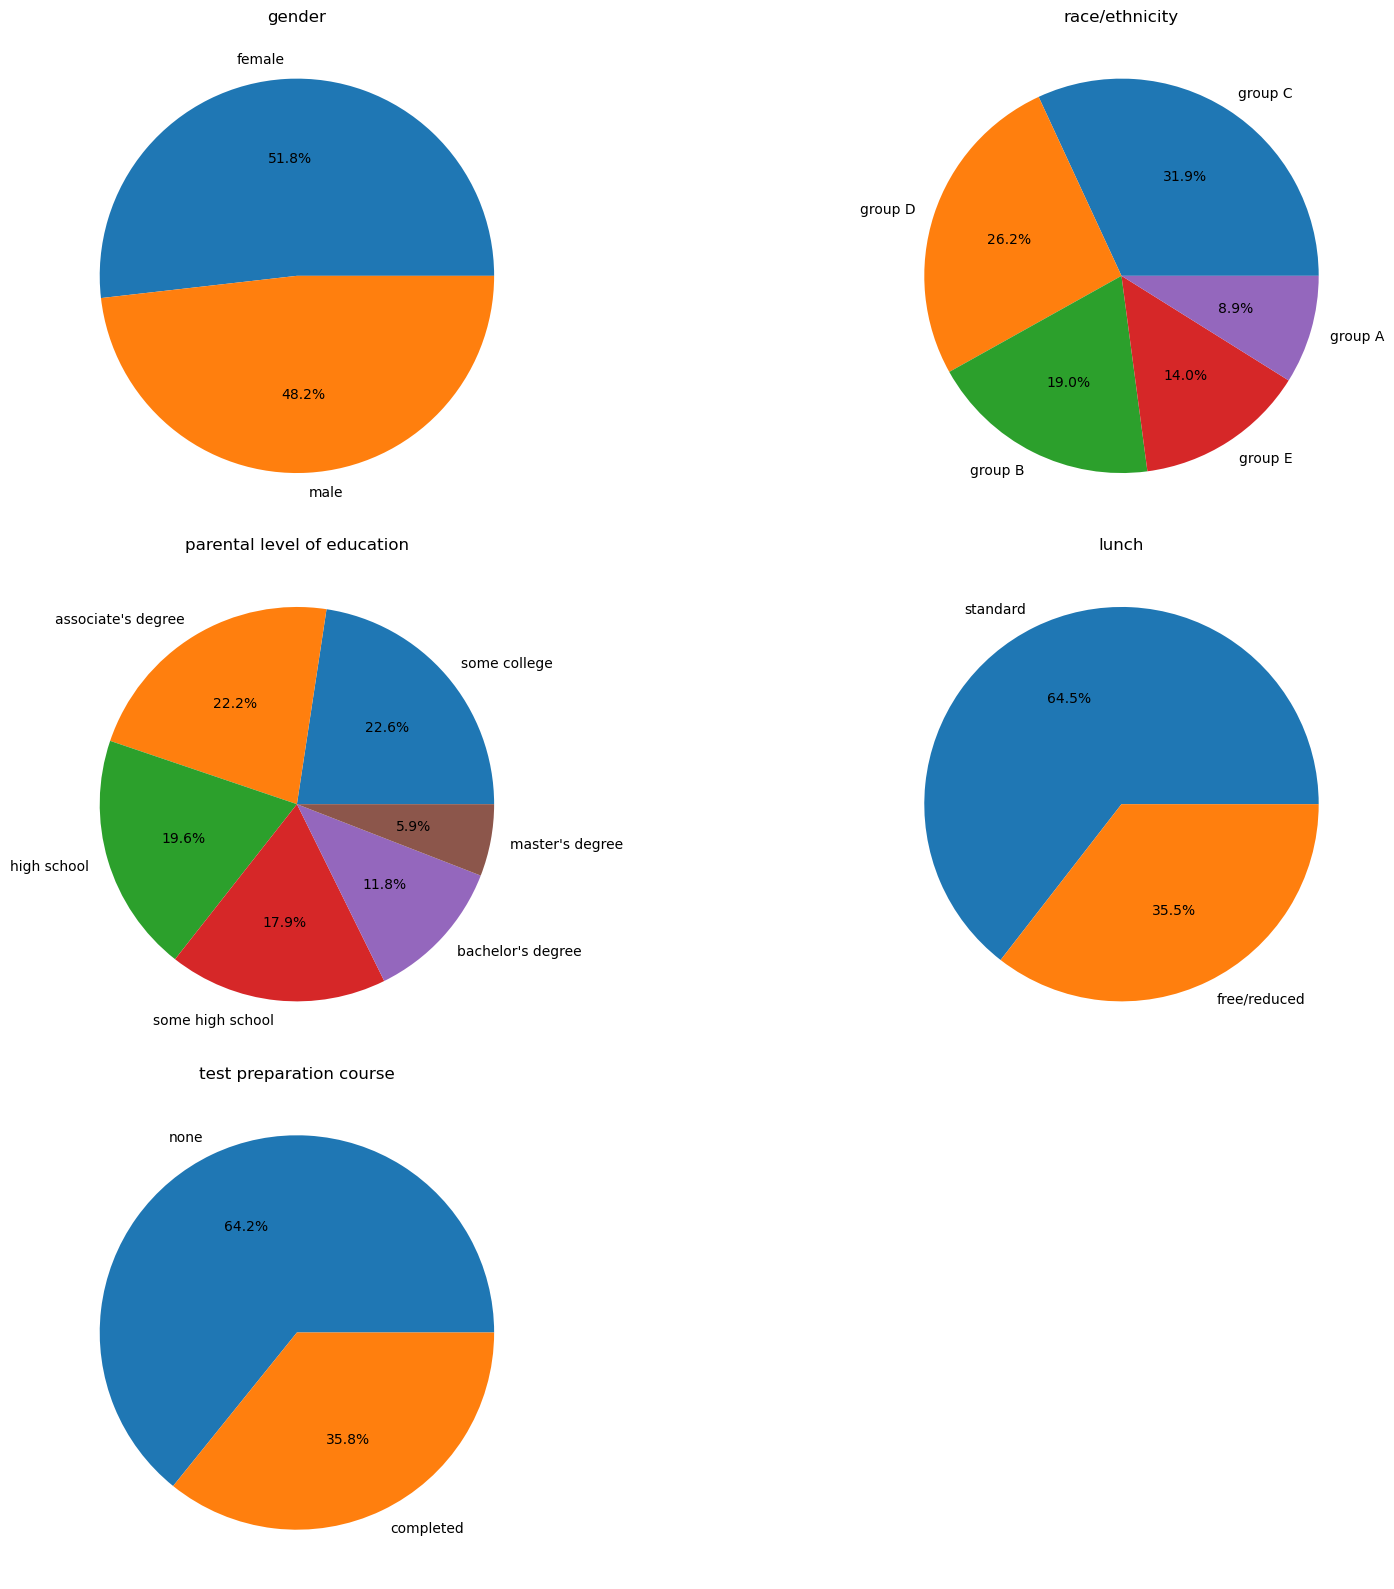

In [58]:
fig, axes = plt.subplots(3, 2, figsize = (18, 16))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    df[feature].value_counts().plot(kind = "pie", ax = axes[i], autopct ="%1.1f%%")
    axes[i].set_title(f"{feature}")
    axes[i].set_ylabel("")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

#### Distribution of Gender 
- The dataset is nearly balanced between female (51.8%) and male (48.2%) students, with a marginal difference of ~40 students. This balanced distribution ensures that any observed differences in test scores between genders and less likely to be an artifact of sample size imbalance, making gender a reliable variable for comparative analysis.
  

#### Distribution of Race/Ethnicity 
- The dataset is dominated by Group C ( 31.9%) and Group D (26.2%), which together represent ober half the student population. Group A is the smallest group at just 8.9% (~89 students). This imbalance means any score - based conclusions drawn about Group A should be interpreted cautiously, as the model or analysis has significantly fewer  examples to learn from for tha group.
  

#### Distribution of Parental Level of Education
- Parental education is fairly spread across six categories with 'some college' (22.6%) and associate degree (22.2%) being the most common. Notably,only 5.9 of parents hold master's degree - the smallest category with roughly 59 students. This suggests that higer parental education is relatively rare in this dataset, which may limist the model's ability to capture its full effect on student performance. Parental education is hypothesized to be a key socioeconomic indicator worth investigating against test scores.

#### Distribution of Lunch Type 
- 64.5% of students receive a standard lunch, while 35.5% receive free/reduced lunch, a commonly used proxy for socioeconomic status in educational datasets. This variable is particularly significant because it may reflect resource availability at home, which could directly influence study habits and academic performance. It warrnats close examination in bivariate analysis against test score.


#### Distribution of Test Preparation Course
- A majority of sudents (64.2%) did not complete a test preparation course, while 35.8% did. Despite being a minority, students who completed the course are expected to show measurably higher scores, making this one of the most actionable variables in the dataset. unlike demographic features (which are fixed), test preparation is an intervention that can be influenced, making it effect on scores especially relevant for real- world recommendations.

### Numerical Variables 

### Understand distribution, spread and outliers

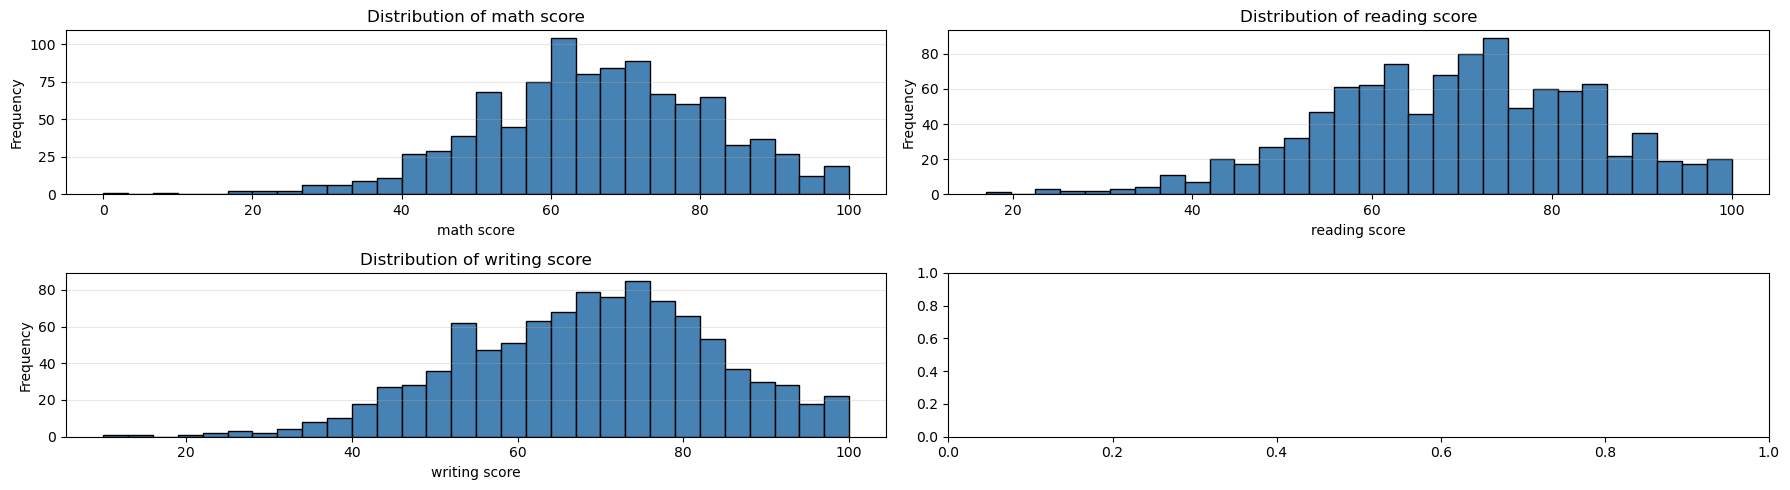

In [85]:
# Histograms 
fix, axes = plt.subplots(2, 2, figsize = (18, 5))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins = 30, color = "steelblue", edgecolor = "black")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis = "y", alpha = 0.3)

plt.tight_layout()
plt.show()

- All three score distributions
  math, reading and writing follow an approximately normal distribution. centered between 60 - 80. All three shows a slight left skew suggesting a small but notable group of students performing significantly below average. This near-normal distribution of scores validated the use of mean-based statistical comparisons across subgroups

math score --> Min: 0, Q1: 57.0, Median: 66.0,Q3: 77.0, Max: 100, IQR: 20.0


reading score --> Min: 17, Q1: 59.0, Median: 70.0,Q3: 79.0, Max: 100, IQR: 20.0


writing score --> Min: 10, Q1: 57.75, Median: 69.0,Q3: 79.0, Max: 100, IQR: 21.25




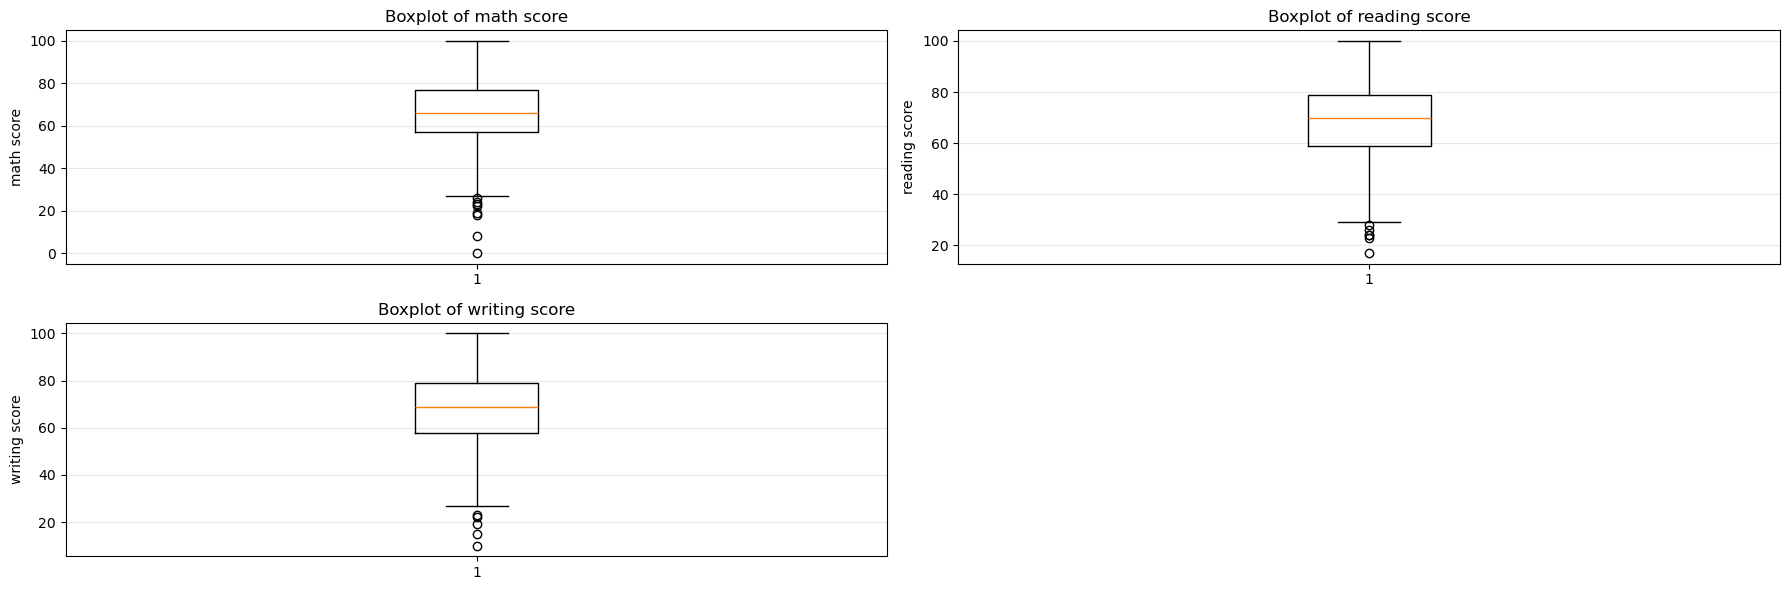

In [93]:
# Box plots - great for spotting outliers
fig, axes = plt.subplots (2, 2, figsize = (18, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_ylabel(feature)
    axes[i].grid(axis = "y", alpha = 0.3)

    q1 = df[feature].quantile(0.25)
    median = df[feature].quantile(0.50)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    print(f"{feature} --> Min: {df[feature].min()}, Q1: {q1}, Median: {median},Q3: {q3}, Max: {df[feature].max()}, IQR: {iqr}\n\n")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


- The box plots reveal that the interquartile range(middle 50% of students) for all three subjects spans roughly 50 - 80, with medians sitting around 66 for 68-70 for reading and writing. A small number of low-score outliers are present in all three subjects.students scoring below 20, which may represent a genuinely struggling subgroup rather than data errors and should not be removed without further investigation. The consistently higer median for reading and writing compared to math reinforces the observation that math performance lags behind other subjects

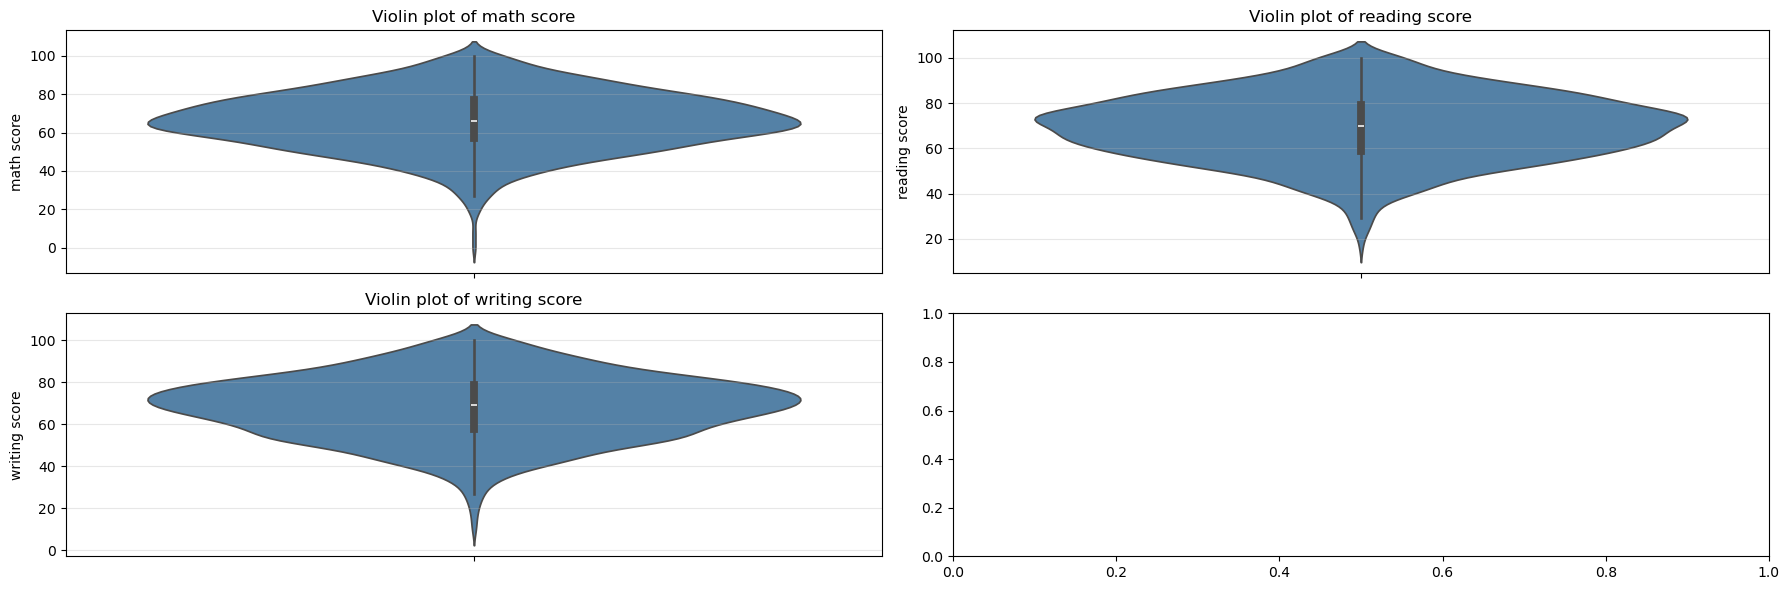

In [96]:
# Vilon plots - shows distribution shape + outliers together
fix, axes = plt.subplots(2, 2, figsize=(18,6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.violinplot(y = df[feature], ax = axes[i], color = "steelblue")
    axes[i].set_title(f"Violin plot of {feature}")
    axes[i].grid( axis = "y", alpha = 0.3)

plt.tight_layout()
plt.show()

- The violin plots combine distribution shape and summary statistics, revealing that the bulk of students cluster between 60 - 80 across all three subjects, visible as the widest part of each violin. The long narrow tail extending towards 0 confirms the presence of low-performing outliers identified in the box plots. All three distributions are unimodal(single peak), suggesting the student population is relatively homogeneous in performance level, without distinct high or low performance subgroups. The similarity in shape across all three scores also hints at strong inter subject correlation, students who score well in one subject tend to score well in others.

### Relationship between Variables 

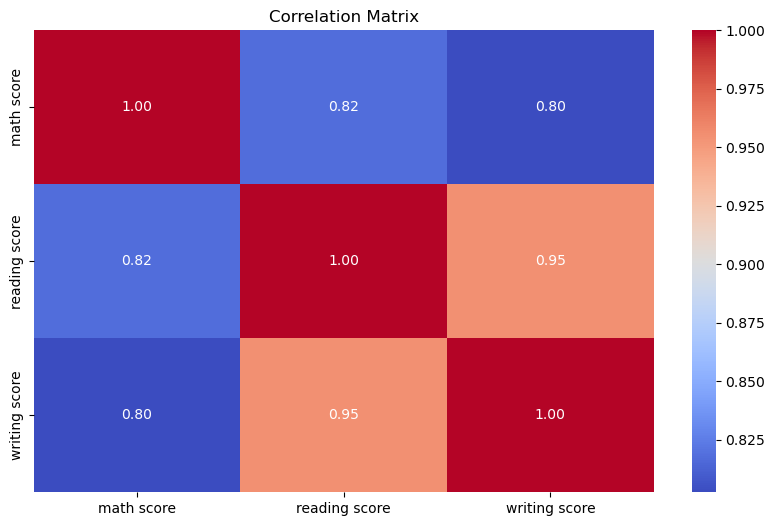

In [97]:
# This is where the real insights come from 
# Correlation matrix heatmap

plt.figure(figsize = (10, 6))
sns.heatmap(df[numerical_features].corr(), annot = True, cmap = "coolwarm",
            fmt= ".2f")
plt.title("Correlation Matrix")
plt.show()

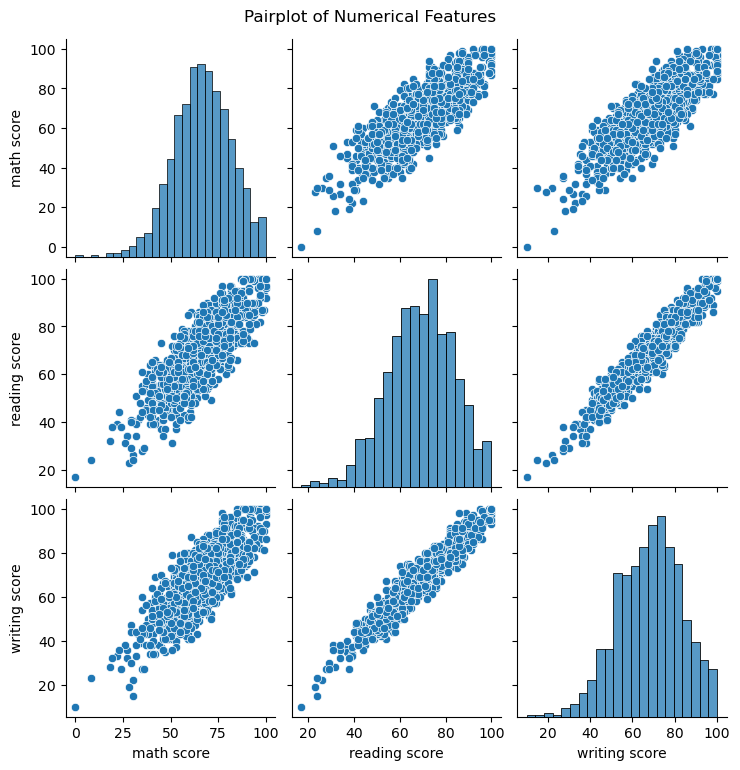

In [101]:
# Scatter plots between all numerical pairs 
sns.pairplot(df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y = 1.02)
plt.show()

### Categorical Vs Numerical

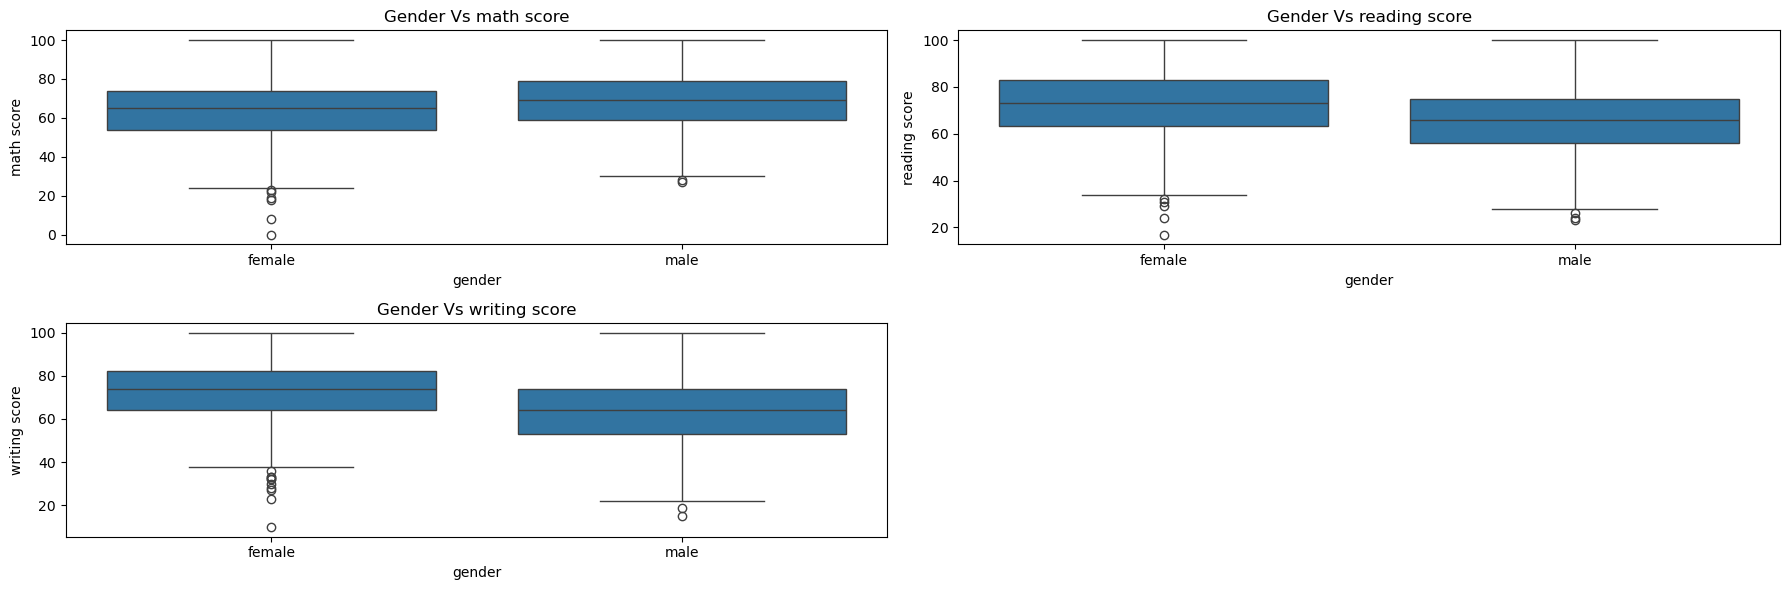

In [109]:
# Scores by categorical variable (eg. gender Vs scores)
fig, axes = plt.subplots(2, 2, figsize = (18, 6))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.boxplot(x = "gender", y = feature, data = df, ax = axes[i])
    axes[i].set_title(f"Gender Vs {feature}")
plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

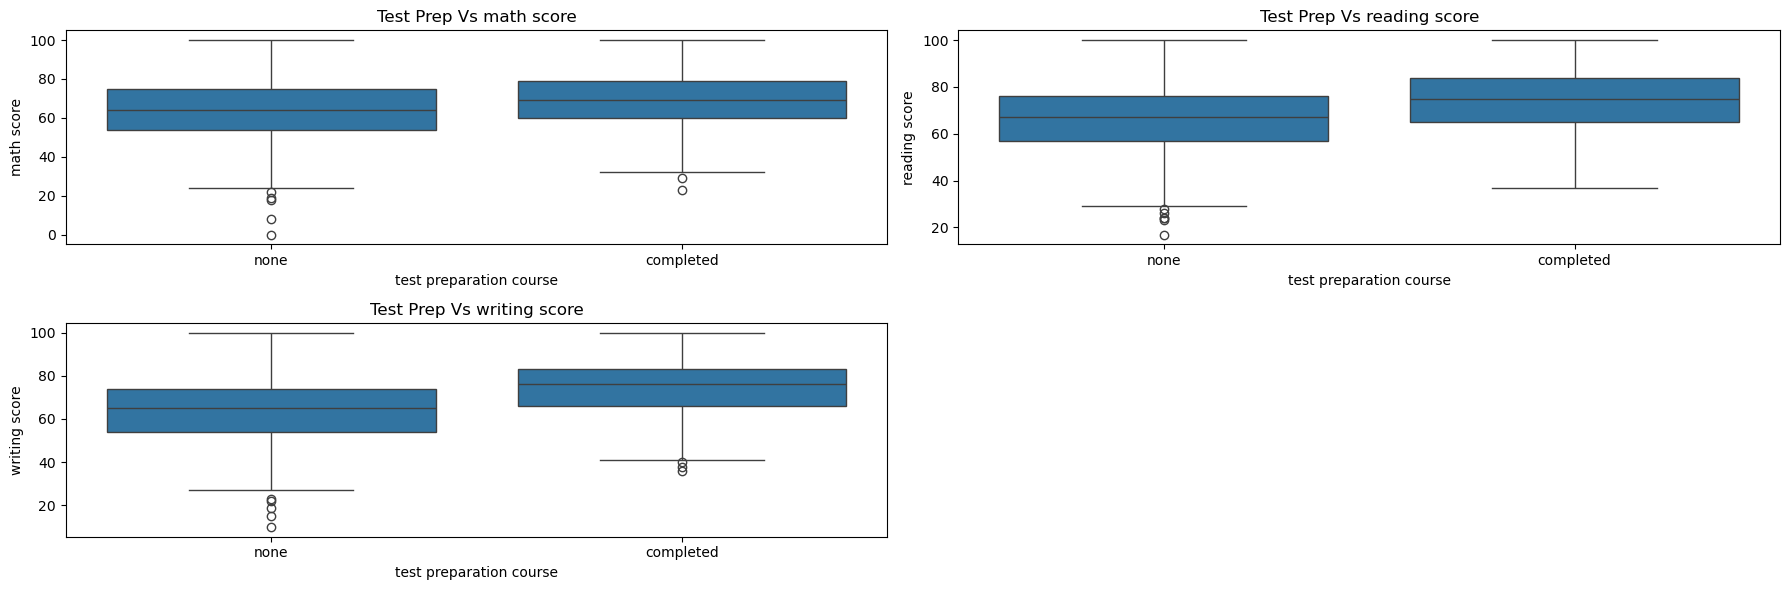

In [112]:
# How test preparation course affects scores
fig, axes = plt.subplots(2, 2, figsize = (18, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x = "test preparation course", y = feature, data = df, ax = axes[i])
    axes[i].set_title(f"Test Prep Vs {feature}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

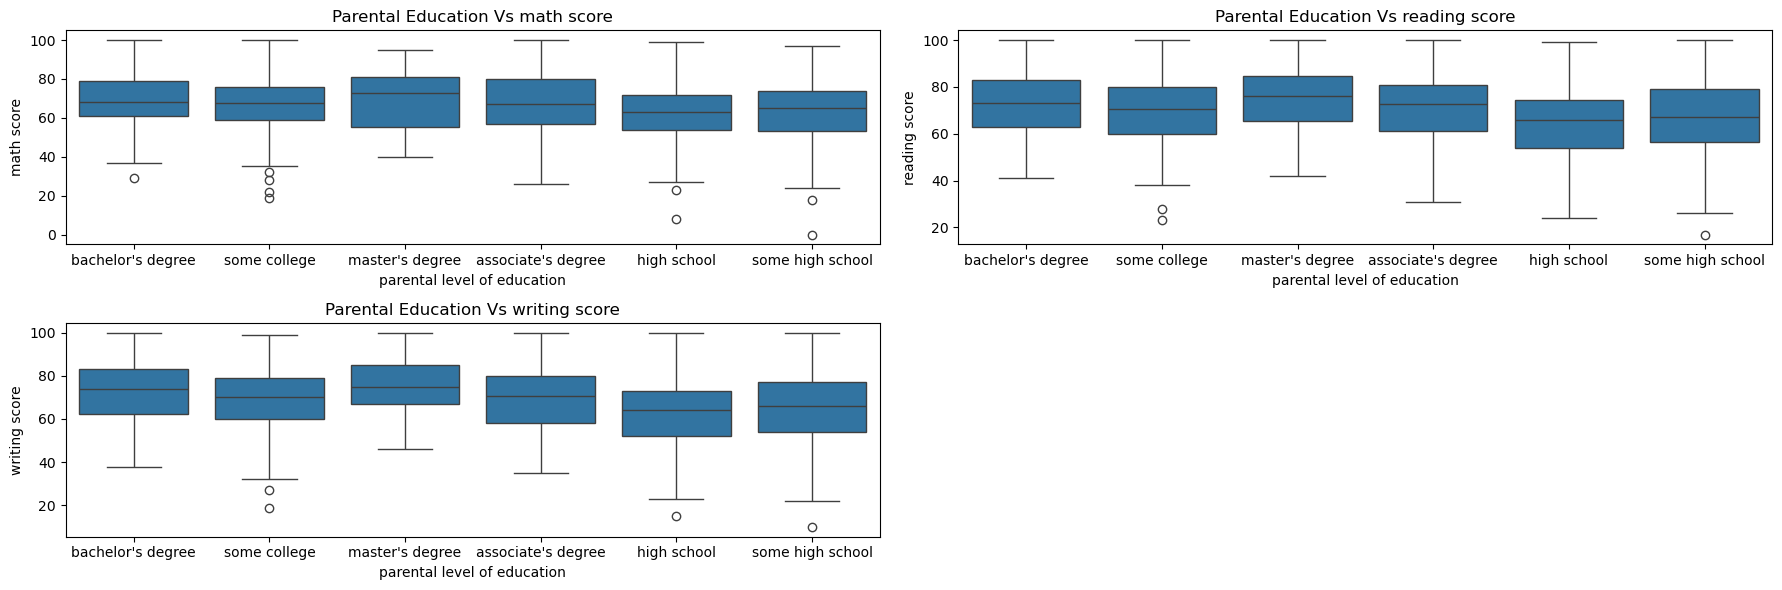

In [114]:
# Parental education Vs scores
fig, axes = plt.subplots(2, 2, figsize = (18,6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x = "parental level of education", y = feature, data = df, ax = axes[i])
    axes[i].set_title(f"Parental Education Vs {feature}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

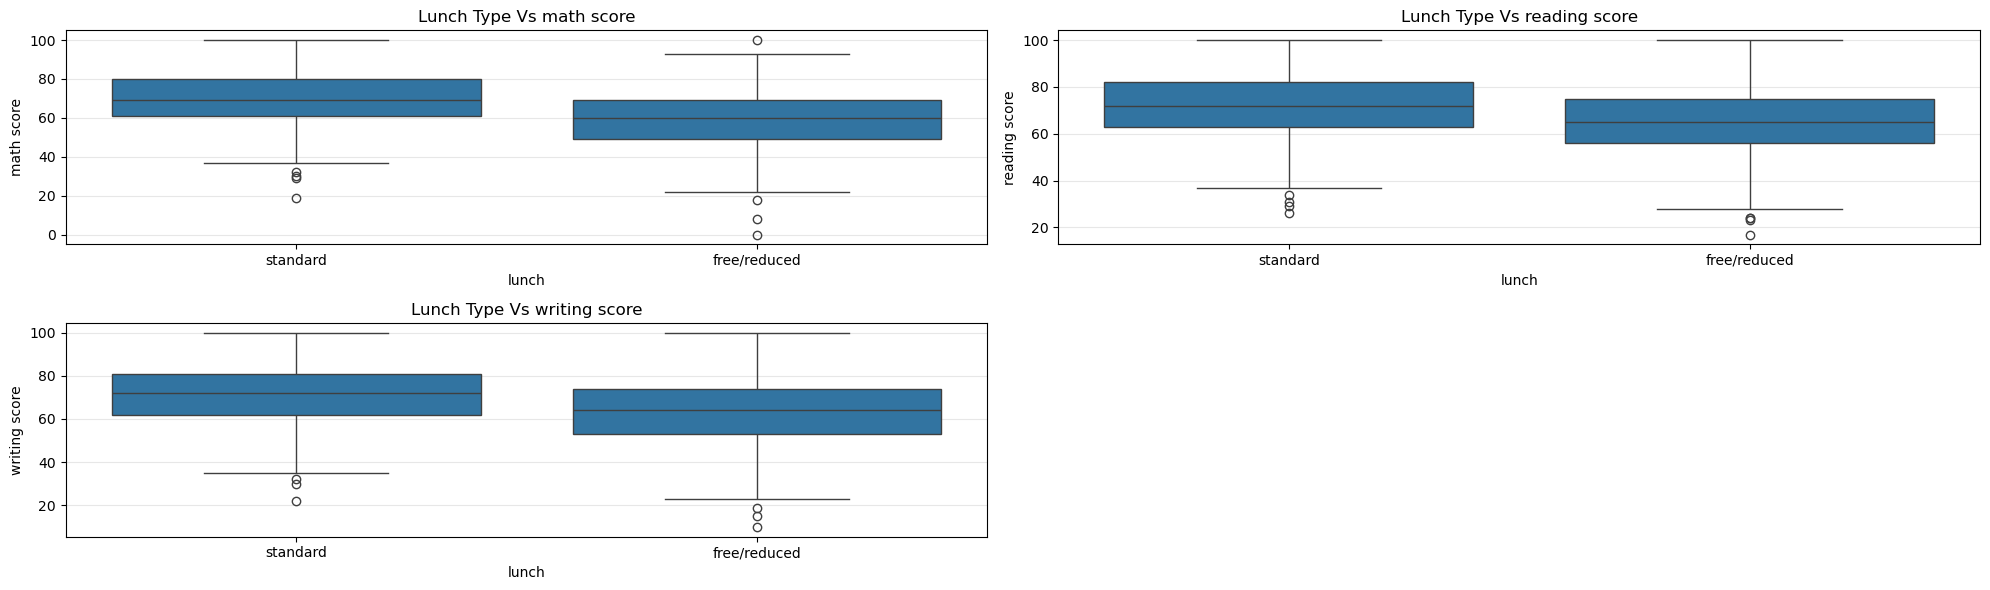

In [77]:
# Lunch type Vs Scores
fig, axes = plt.subplots(2, 2, figsize = (20, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x = "lunch", y = feature, data = df, ax = axes[i])
    axes[i].set_title(f"Lunch Type Vs {feature}")
    axes[i].grid(axis = "y", alpha = 0.3)

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()